In [119]:
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import seaborn as sns

Использованные материалы:

https://itnext.io/string-similarity-the-basic-know-your-algorithms-guide-3de3d7346227

https://www.datacamp.com/community/tutorials/fuzzy-string-python

In [2]:
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 
            else:
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        return "The strings are {} edits away".format(distance[row][col])

### Исправление названий песен

In [3]:
raw_names_tab = pd.read_excel('genres.xlsx')

In [4]:
raw_names_tab.head()

,student,song,coarse_genre,genre1,genre2,genre3
0,Алексей Замалутдинов,Je_veux-Zaz.mp3,Jazz,french jazz,Chanson,NaN
1,Алексей Замалутдинов,У_школьного_порога-Геннадий_Белов.mp3,Pop,Classic russian pop,NaN,NaN
2,Алексей Замалутдинов,Птица_счастья_выбери_меня-Гнатюк.mp3,Pop,Classic russian pop,NaN,NaN
3,Алексей Замалутдинов,Дрозды-Геннадий_Белов.mp3,Pop,Classic russian pop,NaN,NaN
4,Алексей Замалутдинов,Белый теплоход-Синяя_птица.mp3,Pop,Classic russian pop,Chanson,NaN


In [5]:
names_from_data = [f for f in listdir('./data/') if isfile(join('./data/', f))]

In [6]:
names_from_xls = list(raw_names_tab.song)

Теперь у нас есть два листа с названиями песен

In [7]:
names_from_data.sort()
names_from_xls.sort()

Да, тут получился очень неэффективный кусок кода

In [8]:
new_name_list_from_xls = []
new_name_list_from_data = []
ratio_list = []
for name_xls in names_from_xls:
    max_ratio = 0
    max_ratio_xls_name = False
    max_ratio_data_name = False
    for name_data in names_from_data:
        ratio = levenshtein_ratio_and_distance(name_xls, name_data, ratio_calc=True)
        if ratio > 0.80:
            if ratio > max_ratio:
                max_ratio = ratio
                max_ratio_xls_name = name_xls
                max_ratio_data_name = name_data
            break
            
    if max_ratio_data_name and max_ratio_xls_name:
        new_name_list_from_xls.append(max_ratio_xls_name)
        new_name_list_from_data.append(max_ratio_data_name)
        ratio_list.append(max_ratio)  

In [9]:
data = pd.DataFrame({'from_xls': new_name_list_from_xls, 'from_data': new_name_list_from_data, 
                     'ratio' : ratio_list})

In [10]:
genres_data_sorted = raw_names_tab.sort_values('song', axis=0, ascending=True)

In [11]:
data_sorted = data.sort_values('from_xls', axis=0, ascending=True)

In [12]:
genres_data_sorted.index = list(genres_data_sorted.song)
data_sorted.index = list(data_sorted.from_xls)

In [13]:
new_data = pd.concat([genres_data_sorted, data_sorted], axis=1, sort=True)

In [14]:
new_data.dropna(subset = ["from_data"], inplace=True)

In [15]:
new_data

,student,song,coarse_genre,genre1,genre2,genre3,from_xls,from_data,ratio
7Horse_-_Answer_the_Bell,Шемякина Аня,7Horse_-_Answer_the_Bell,Rock,Blues Rock,NaN,NaN,7Horse_-_Answer_the_Bell,7Horse_-_Answer_the_Bell.mp3,0.923077
A_Simple_Life-Brian_Crain,Людмила_Проценко,A_Simple_Life-Brian_Crain,classic,neo-classical,new age piano,NaN,A_Simple_Life-Brian_Crain,A_Simple_Life-Brian_Crain.mp3,0.925926
Adagio_in_G_Minor-Albinoni,Никанорова Даша,Adagio_in_G_Minor-Albinoni,Classic,Instrumental,NaN,NaN,Adagio_in_G_Minor-Albinoni,Adagio_in_G_Minor-Albinoni.mp3,0.928571
Age_Atomic-Solar_Bears,Паша_Дерябин,Age_Atomic-Solar_Bears,electro,Synthwave,NaN,NaN,Age_Atomic-Solar_Bears,Age_Atomic-Solar_Bears.mp3,0.916667
Agnus_Dei-Enigma,Darya Khaleneva,Agnus_Dei-Enigma,new_age,downtempo,ambient,NaN,Agnus_Dei-Enigma,Agnus_Dei-Enigma.mp3,0.888889
...,...,...,...,...,...,...,...,...,...
Электрослабость-Терентий,Aleksei Zverev,Электрослабость-Терентий,rock,punk,NaN,NaN,Электрослабость-Терентий,Электрослабость-Терентий.mp3,0.923077
Я_говорю_тебе_да-Зоя_Ященко_и_группа_Белая_Гвардия.mp3,Данил_Литвинов,Я_говорю_тебе_да-Зоя_Ященко_и_группа_Белая_Гва...,Art_song,Indie_Rock,NaN,NaN,Я_говорю_тебе_да-Зоя_Ященко_и_группа_Белая_Гва...,Я_говорю_тебе_да-Зоя_Ященко_и_группа_Белая_Гва...,1.000000
Я_не_один-Эм_Калинин.mp3,Данил_Литвинов,Я_не_один-Эм_Калинин.mp3,Indie,Hip-Hop,NaN,NaN,Я_не_один-Эм_Калинин.mp3,Я_не_один-Эм_Калинин.mp3,1.000000
Я_так_соскучился-Порнофильмы.mp3,Данил_Литвинов,Я_так_соскучился-Порнофильмы.mp3,Rock,Punk_Rock,NaN,NaN,Я_так_соскучился-Порнофильмы.mp3,Я_так_соскучился-Порнофильмы.mp3,1.000000


Теперь нужно почистить датасет, а также убрать пробелы из названий песен

In [50]:
fixed_names = []
for i in list(new_data.from_data):
    if " " in i:
        i = i.replace(' ', '_')
    if ',' in i:
        i = i.replace(',', '')
    if '___' in i:
        i = i.replace('___', '_')
    if '__' in i:
        i = i.replace('__', '_')
    if '_!' in i:
        i = i.replace('_!', '!')
    if '(!)' in i:
        i = i.replace('(!)', '!')
    if '_-_' in i:
        i = i.replace('_-_', '-')
    if '_-' in i:
        i = i.replace('_-_', '-')
    if '-' in i:
        i = i.replace('-', '--')
    if '+' in i:
        i = i.replace('+', '_')
    if '_.' in i:
        i = i.replace('_.', '.')
    if 'feat._' in i:
        i = i.replace('feat._', 'feat_')
    if 'ft._' in i:
        i = i.replace('ft._', 'feat_')

In [52]:
d_fixed = {'fixed_names': fixed_names}

In [53]:
data_fixed = pd.DataFrame(d_fixed)

In [56]:
data_fixed.index = list(data_sorted.from_xls)

In [57]:
fixed = pd.concat([new_data, data_fixed], axis=1, sort=True)

In [60]:
fixed = fixed.drop(['student', 'song', 'from_xls', 'ratio'], axis=1)

In [62]:
fixed.head()

,coarse_genre,genre1,genre2,genre3,from_data,fixed_names
7Horse_-_Answer_the_Bell,Rock,Blues Rock,NaN,NaN,7Horse_-_Answer_the_Bell.mp3,7Horse--Answer_the_Bell.mp3
A_Simple_Life-Brian_Crain,classic,neo-classical,new age piano,NaN,A_Simple_Life-Brian_Crain.mp3,A_Simple_Life--Brian_Crain.mp3
Adagio_in_G_Minor-Albinoni,Classic,Instrumental,NaN,NaN,Adagio_in_G_Minor-Albinoni.mp3,Adagio_in_G_Minor--Albinoni.mp3
Age_Atomic-Solar_Bears,electro,Synthwave,NaN,NaN,Age_Atomic-Solar_Bears.mp3,Age_Atomic--Solar_Bears.mp3
Agnus_Dei-Enigma,new_age,downtempo,ambient,NaN,Agnus_Dei-Enigma.mp3,Agnus_Dei--Enigma.mp3


Теперь у нас есть полноценный датасет с нормальными названиями, но названия в папке всё ещё кривые. 

In [104]:
for song in list(fixed.from_data):
    old_name = './data/' + song
    new_name = './data/' + list(fixed.query('from_data == @song').fixed_names)[0]
    os.rename(old_name, new_name)

В папке './data' теперь содержатся песни с нормальным названием

In [106]:
fixed = fixed.drop('from_data', axis=1)

In [108]:
fixed.reset_index(drop=True, inplace=True)

In [110]:
fixed = fixed.drop(['genre1', 'genre2', 'genre3'], axis=1)

In [111]:
fixed.head()

,coarse_genre,fixed_names
0,Rock,7Horse--Answer_the_Bell.mp3
1,classic,A_Simple_Life--Brian_Crain.mp3
2,Classic,Adagio_in_G_Minor--Albinoni.mp3
3,electro,Age_Atomic--Solar_Bears.mp3
4,new_age,Agnus_Dei--Enigma.mp3


In [112]:
data = fixed

Теперь имеет смысл расправиться уже непосредственно с названиями жанров. 

In [129]:
for i in list(data.coarse_genre):
    data.replace(i, i.lower(), inplace=True)
    
for i in list(data.coarse_genre):
    if ' ' in i:
        data.replace(i, i.replace(' ', '_'), inplace=True)
    elif '-' in i:
        data.replace(i, i.replace('-', '_'), inplace=True)
    
for i in set(data.coarse_genre):
    if 'rock' in i:
        data.coarse_genre.replace(i, "rock", inplace=True)
    elif 'metal' in i:
        data.coarse_genre.replace(i, "metal", inplace=True)
    elif 'pop' in i:
        data.coarse_genre.replace(i, "pop", inplace=True)
    elif 'punk' in i:
        data.coarse_genre.replace(i, "punk", inplace=True)
        
data.coarse_genre.replace("ethnic", "folk", inplace=True)
data.coarse_genre.replace("disco", "dance", inplace=True)
data.coarse_genre.replace("instrumental", "classic", inplace=True)    
data.coarse_genre.replace("orchestral", "classic", inplace=True)  
data.coarse_genre.replace("romance", "blues", inplace=True)  
data.coarse_genre.replace("art_song", "classic", inplace=True)  
data.coarse_genre.replace("alternative", "rock", inplace=True)  
data.coarse_genre.replace("punk", "rock", inplace=True)
data.replace("classics", "classic", inplace=True)
data.replace("rap", "hip_hop", inplace=True)
data.replace("electronica", "electronic", inplace=True)
data.replace("ethnic", "folk", inplace=True)
data.replace("orchestral", "classic", inplace=True)
data.replace("instrumental", "classic", inplace=True)
data.replace("disco", "dance", inplace=True)

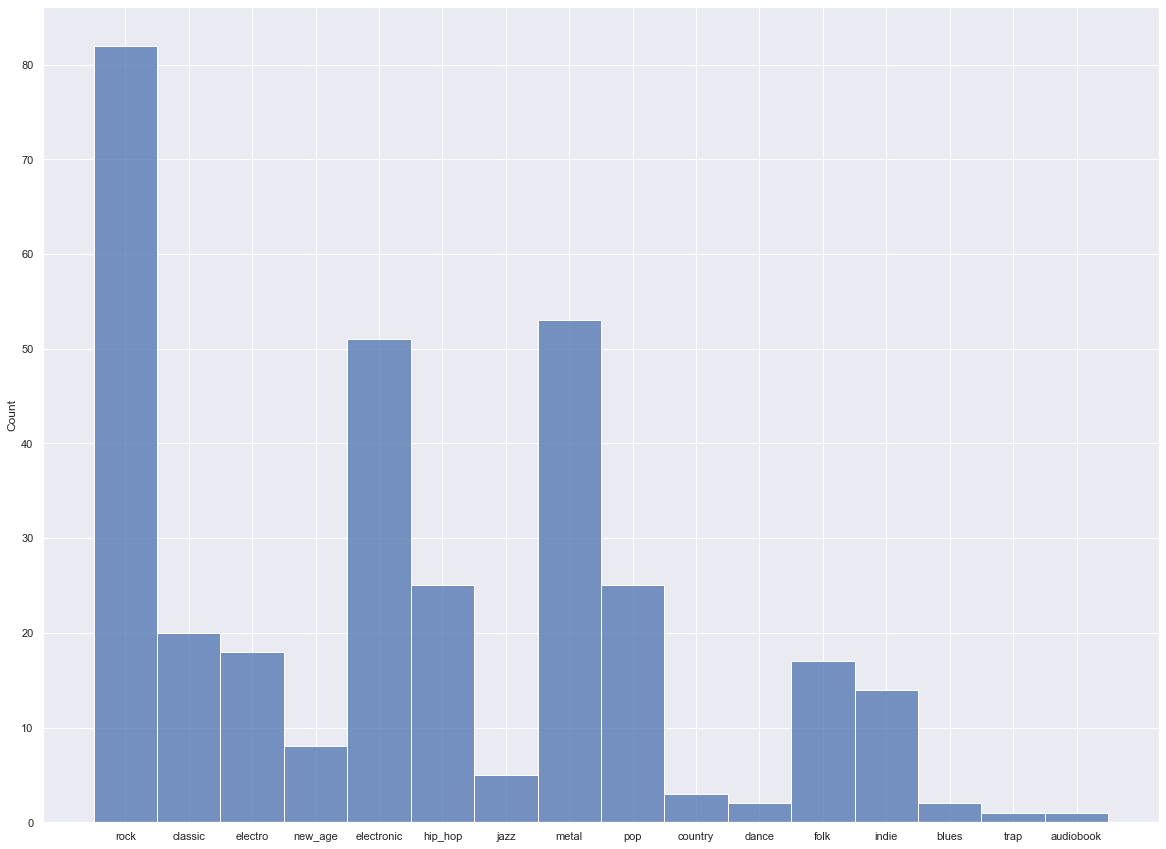

In [130]:
sns.set(rc={'figure.figsize':(20, 15)})
sns.histplot(list(data.coarse_genre));

In [135]:
for i in set(data.coarse_genre):
    if len(data.query('coarse_genre == @i')) >= 20:
        print(i)

electronic
rock
pop
hip_hop
metal
classic


Мы можем увидеть только те жанры, для которых имеется больше 20 песен. Для дальнейшего анализа оставим только их.

In [143]:
data_20 = data.query('coarse_genre == "rock" | coarse_genre == "classic"\
                  | coarse_genre == "electronic" |coarse_genre == "hip_hop"\
                  | coarse_genre == "metal" | coarse_genre == "pop"')

In [146]:
data_20 = data_20.rename(columns={'fixed_names':'song'})

In [147]:
data_20

,coarse_genre,song
0,rock,7Horse--Answer_the_Bell.mp3
1,classic,A_Simple_Life--Brian_Crain.mp3
2,classic,Adagio_in_G_Minor--Albinoni.mp3
5,electronic,Alakazam!--Justice.mp3
6,electronic,Amanita--Hypnotic_Tribe.mp3
...,...,...
321,rock,Штуки--Анимация.mp3
322,rock,Электрослабость--Терентий.mp3
323,classic,Я_говорю_тебе_да--Зоя_Ященко_и_группа_Белая_Гв...
325,rock,Я_так_соскучился--Порнофильмы.mp3


Теперь в наших данных осталось только 256 песен из самых популярных жанров

In [150]:
data_20.to_csv('genres_for_cluster.csv', index=False)

Удалим песни, которых нет в таблице с данными

In [151]:
names_from_data_test = [f for f in listdir('./data/') if isfile(join('./data/', f))]

In [154]:
delete_list = []
for i in names_from_data_test:
    if i not in list(data_20.song):
        delete_list.append(i)

In [156]:
for i in delete_list:
    os.remove(('./data/' + i))

Таблица и папка с данными готовы для дальнейшей работы